In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import pickle

In [3]:
# Read the dataset.

heart_data = pd.read_csv('archive (2)/heart.csv')
heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
# cp - Chestpain.
# trestbps - resting blood pressure.
# chol - cholestrol (mg/dl)
# fbs - fasting blood sugar.
# restecg - resting electro cardiographic results.
# thalach - maximum heart rate achieved.
# exang - exercise induced angina.
# oldpeak - ST depression induced by exercise when compared to rest.
# slope - slope of the peak exercise ST segment.
# ca - no. of major vessels.
# thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
# target - 0 = no disease;1 - disease.

In [5]:
# Let's check the info of the dataset.
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Insights:

1. There are no null values observed in this dataset.
2. The dataset has 1025 rows starting from 0 to 1024 and 13 features including target feature.
3. The dataset has 1 float type feature (oldpeak) and rest all are integer type features.

In [6]:
# To perform descriptive statistics.
heart_data.describe().T

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323902   0.620660    0.0    2.0    2.0    3.0    3.0
target    1025.0    0.513171   0.500070    0.0    0.0    1.0    1.0    1.0

In [7]:
# To identify the no. of unique values in specified columns.
cols_for_nunique = ['cp','fbs','restecg','exang','slope','ca','thal']

nunique_dict = {}
for col in cols_for_nunique:
    count = heart_data[col].nunique()
    nunique_dict[col]=count

print(nunique_dict)

{'cp': 4, 'fbs': 2, 'restecg': 3, 'exang': 2, 'slope': 3, 'ca': 5, 'thal': 4}


In [8]:
# To identify the unique values in each specified columns above.

unique_dict = {}

for col in cols_for_nunique:
    unique_values = heart_data[col].unique()
    unique_dict[col] = list(unique_values)
print(unique_dict)

{'cp': [0, 1, 2, 3], 'fbs': [0, 1], 'restecg': [1, 0, 2], 'exang': [0, 1], 'slope': [2, 0, 1], 'ca': [2, 0, 1, 3, 4], 'thal': [3, 2, 1, 0]}


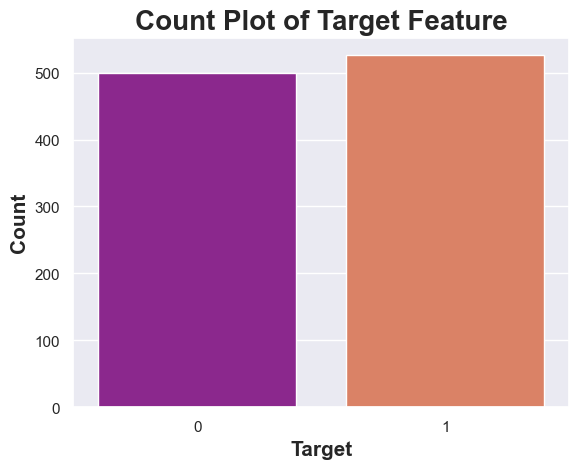

In [9]:
# Visualization of target variable using count plot.

sns.set_style('whitegrid')
sns.set(font_scale = 1)
sns.countplot(x = 'target', data = heart_data, palette = 'plasma')
plt.title('Count Plot of Target Feature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Target', fontsize = 15, fontweight = 'bold')
plt.ylabel('Count', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

1. The classes are well balanced.
2. The data of people having heart disease is little more higher than people with no heart diseases.

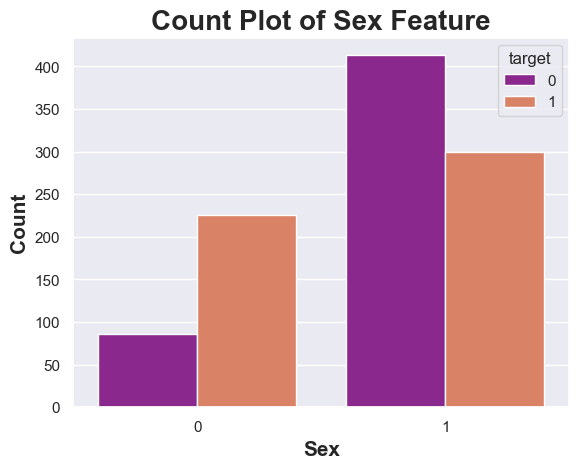

In [10]:
# Visualization of sex feature with hue as target.

sns.countplot(x = 'sex', data = heart_data, palette = 'plasma', hue = 'target')
plt.title('Count Plot of Sex Feature', fontsize = 20, fontweight = 'bold')
plt.xlabel('Sex', fontsize = 15, fontweight = 'bold')
plt.ylabel('Count', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

1. Sex --> 0 - female; 1 - male.
2. target --> 0 - no disease; 1 - with heart disease.
3. Out of 312 males, around 226 females are with heart disease. (count obtained from below groupby command)
4. Out of 713 females, close to 300 males are with heart disease.
5. From this dataset, males are more affected by heart disease as the distribution of data with respect to males are higher when compared to females.

In [11]:
# Groupby to fetch the count of male & female who has heart disease.
heart_data.groupby('sex')['target'].sum()

sex
0    226
1    300
Name: target, dtype: int64

In [12]:
# Value counts of males & females.
heart_data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

<Axes: >

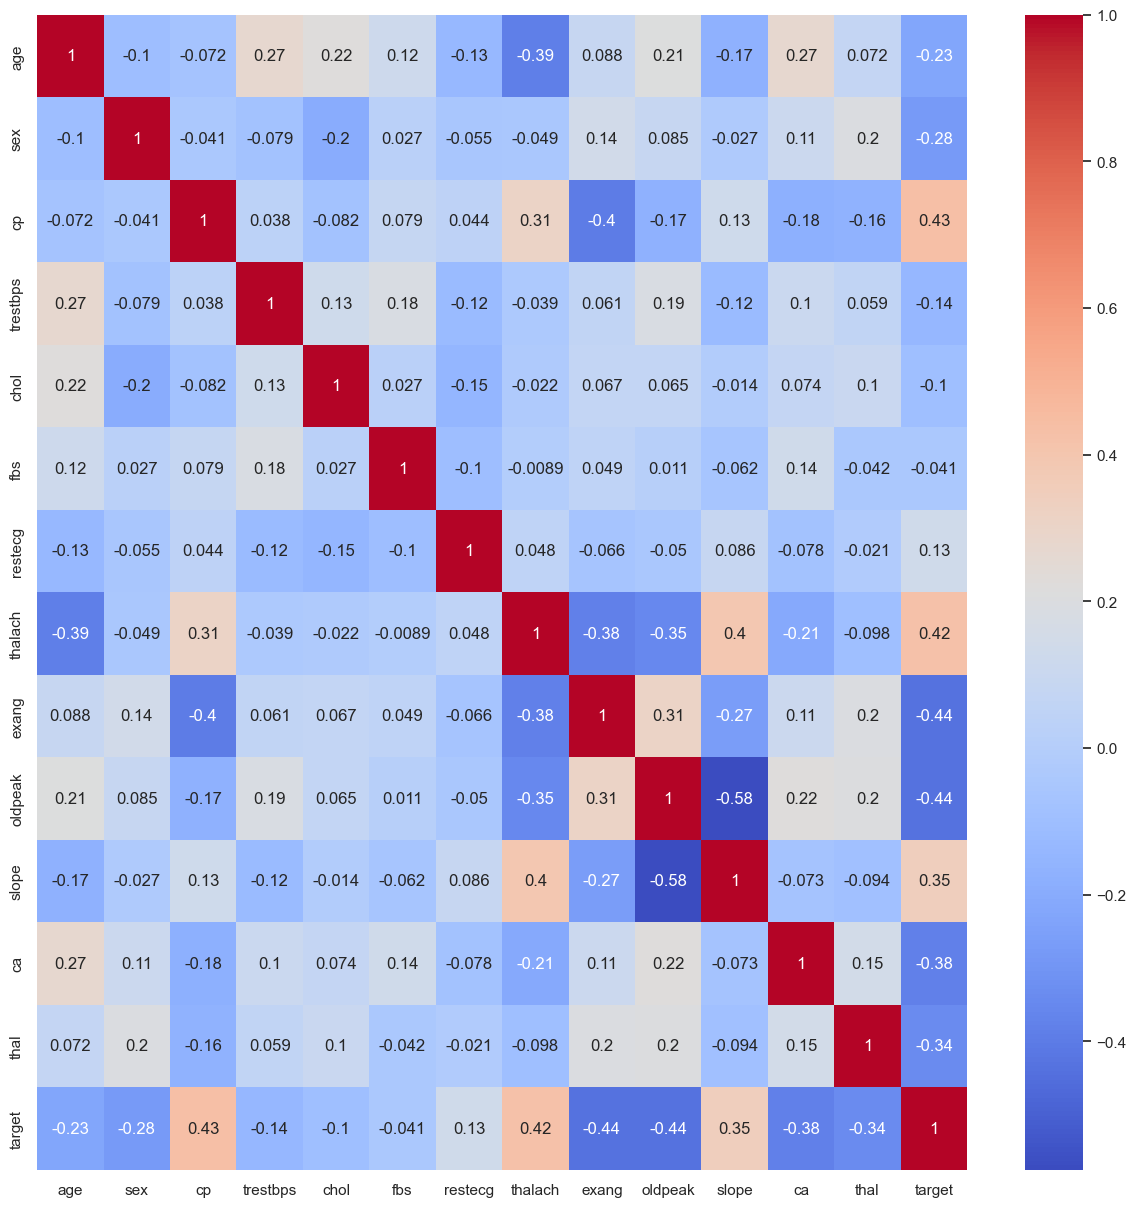

In [13]:
# Visualization of features to identify correlation.

plt.figure(figsize = (15,15))
sns.heatmap(heart_data.corr(), annot = True, cmap = 'coolwarm')

## Insights:

1. With respect to target, cp, thalach & slope are highly positively correlated.
2. With respect to positive correlation between independent features, cp & thalach are positively correlated (0.31), thalach & slope are positively correlated (0.4) and oldpeak & exang (0.31) are positively correlated.
3. With respect to negative correlation between independent features, oldpeak & slope are negatively correlated (-0.58), thalach & exang are negatively correlated (-0.38), age & thalach are negatively correlated (-0.39) and thalach & oldpeak are negatively correlated (-0.35).

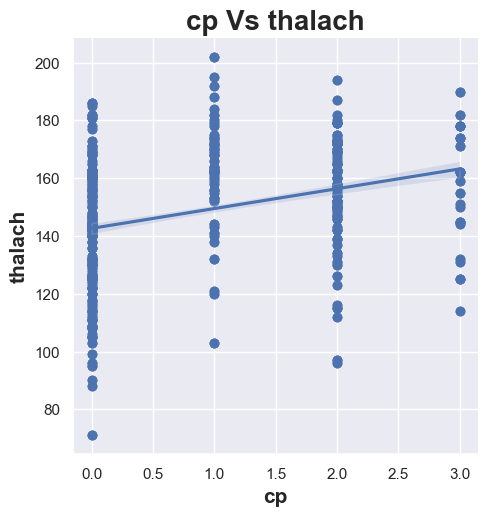

In [14]:
# Let's understand the positive correlation between independent features using lmplot.

sns.lmplot(x = 'cp', y = 'thalach', data = heart_data)
plt.title('cp Vs thalach', fontsize = 20, fontweight = 'bold')
plt.xlabel('cp', fontsize = 15, fontweight = 'bold')
plt.ylabel('thalach', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

As cp & thalach are positively correlated (from heatmap), the best fit line or slope moves in the positive direction.

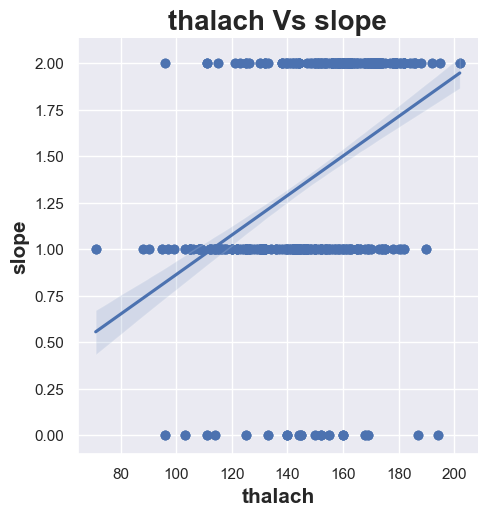

In [15]:
sns.lmplot(x = 'thalach', y = 'slope', data = heart_data)
plt.title('thalach Vs slope', fontsize = 20, fontweight = 'bold')
plt.xlabel('thalach', fontsize = 15, fontweight = 'bold')
plt.ylabel('slope', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

As thalach & slope are positively correlated (0.4), the best fit or slope of the line moves in the positive direction.

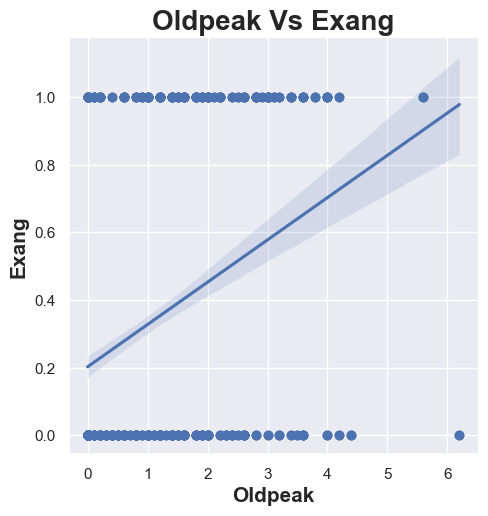

In [16]:
sns.lmplot(x = 'oldpeak', y = 'exang', data = heart_data)
plt.title('Oldpeak Vs Exang', fontsize = 20, fontweight = 'bold')
plt.xlabel('Oldpeak', fontsize = 15, fontweight = 'bold')
plt.ylabel('Exang', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

As oldpeak & exang are positively correlated (0.31), their slope or best fit line moves in the positive direction.

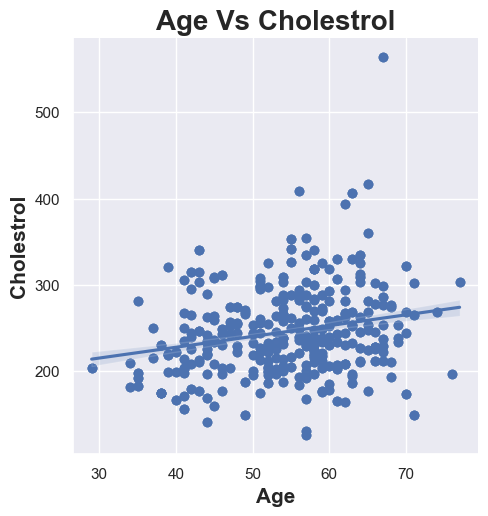

In [17]:
# Let's visualize between age & cholestrol.

sns.lmplot(x = 'age', y = 'chol', data = heart_data)
plt.title('Age Vs Cholestrol', fontsize = 20, fontweight = 'bold')
plt.xlabel('Age', fontsize = 15, fontweight = 'bold')
plt.ylabel('Cholestrol', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

1. Age & Cholestrol are positively correlated as we can see a positive slope.
2. However, this doesn't denote that increase in age will also increase the cholestrol content and vice-versa.

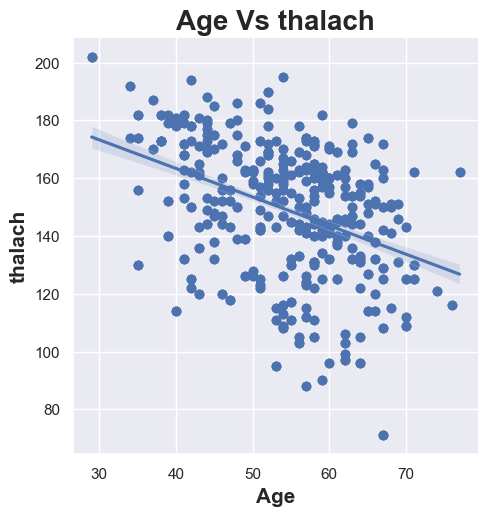

In [18]:
# Let's understand the negative correlation between independent features using lmplot.

sns.lmplot(x = 'age', y = 'thalach', data = heart_data)
plt.title('Age Vs thalach', fontsize = 20, fontweight = 'bold')
plt.xlabel('Age', fontsize = 15, fontweight = 'bold')
plt.ylabel('thalach', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

1. As age & thalach are negatively correlated (-0.39), the best fit line or slope moves in negative direction.
2. However, this cannot be considered as causation as lower age doesn't always tend to higher thalach.

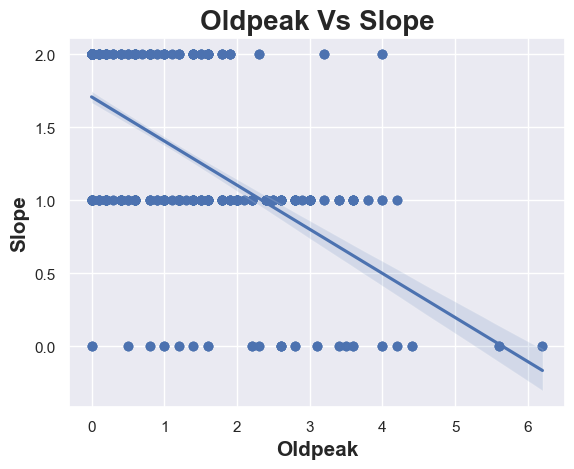

In [19]:
# oldpeak Vs slope
sns.regplot(x = 'oldpeak', y = 'slope', data = heart_data)
plt.title('Oldpeak Vs Slope', fontsize = 20, fontweight = 'bold')
plt.xlabel('Oldpeak', fontsize = 15, fontweight = 'bold')
plt.ylabel('Slope', fontsize = 15, fontweight  = 'bold')
plt.show()

## Insights:

Oldpeak & Slope are negatively correlated and so the slope or best fit line moves in negative direction.

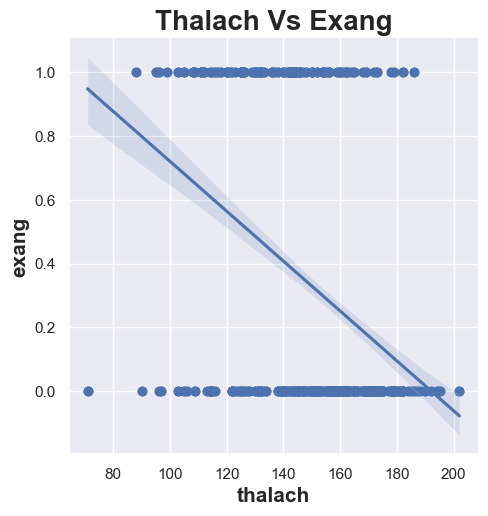

In [20]:
# thalach Vs exang
sns.lmplot(x = 'thalach', y = 'exang', data = heart_data)
plt.title('Thalach Vs Exang', fontsize = 20, fontweight = 'bold')
plt.xlabel('thalach', fontsize = 15, fontweight = 'bold')
plt.ylabel('exang', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

Higher thalach induces lower exang.

In [21]:
heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

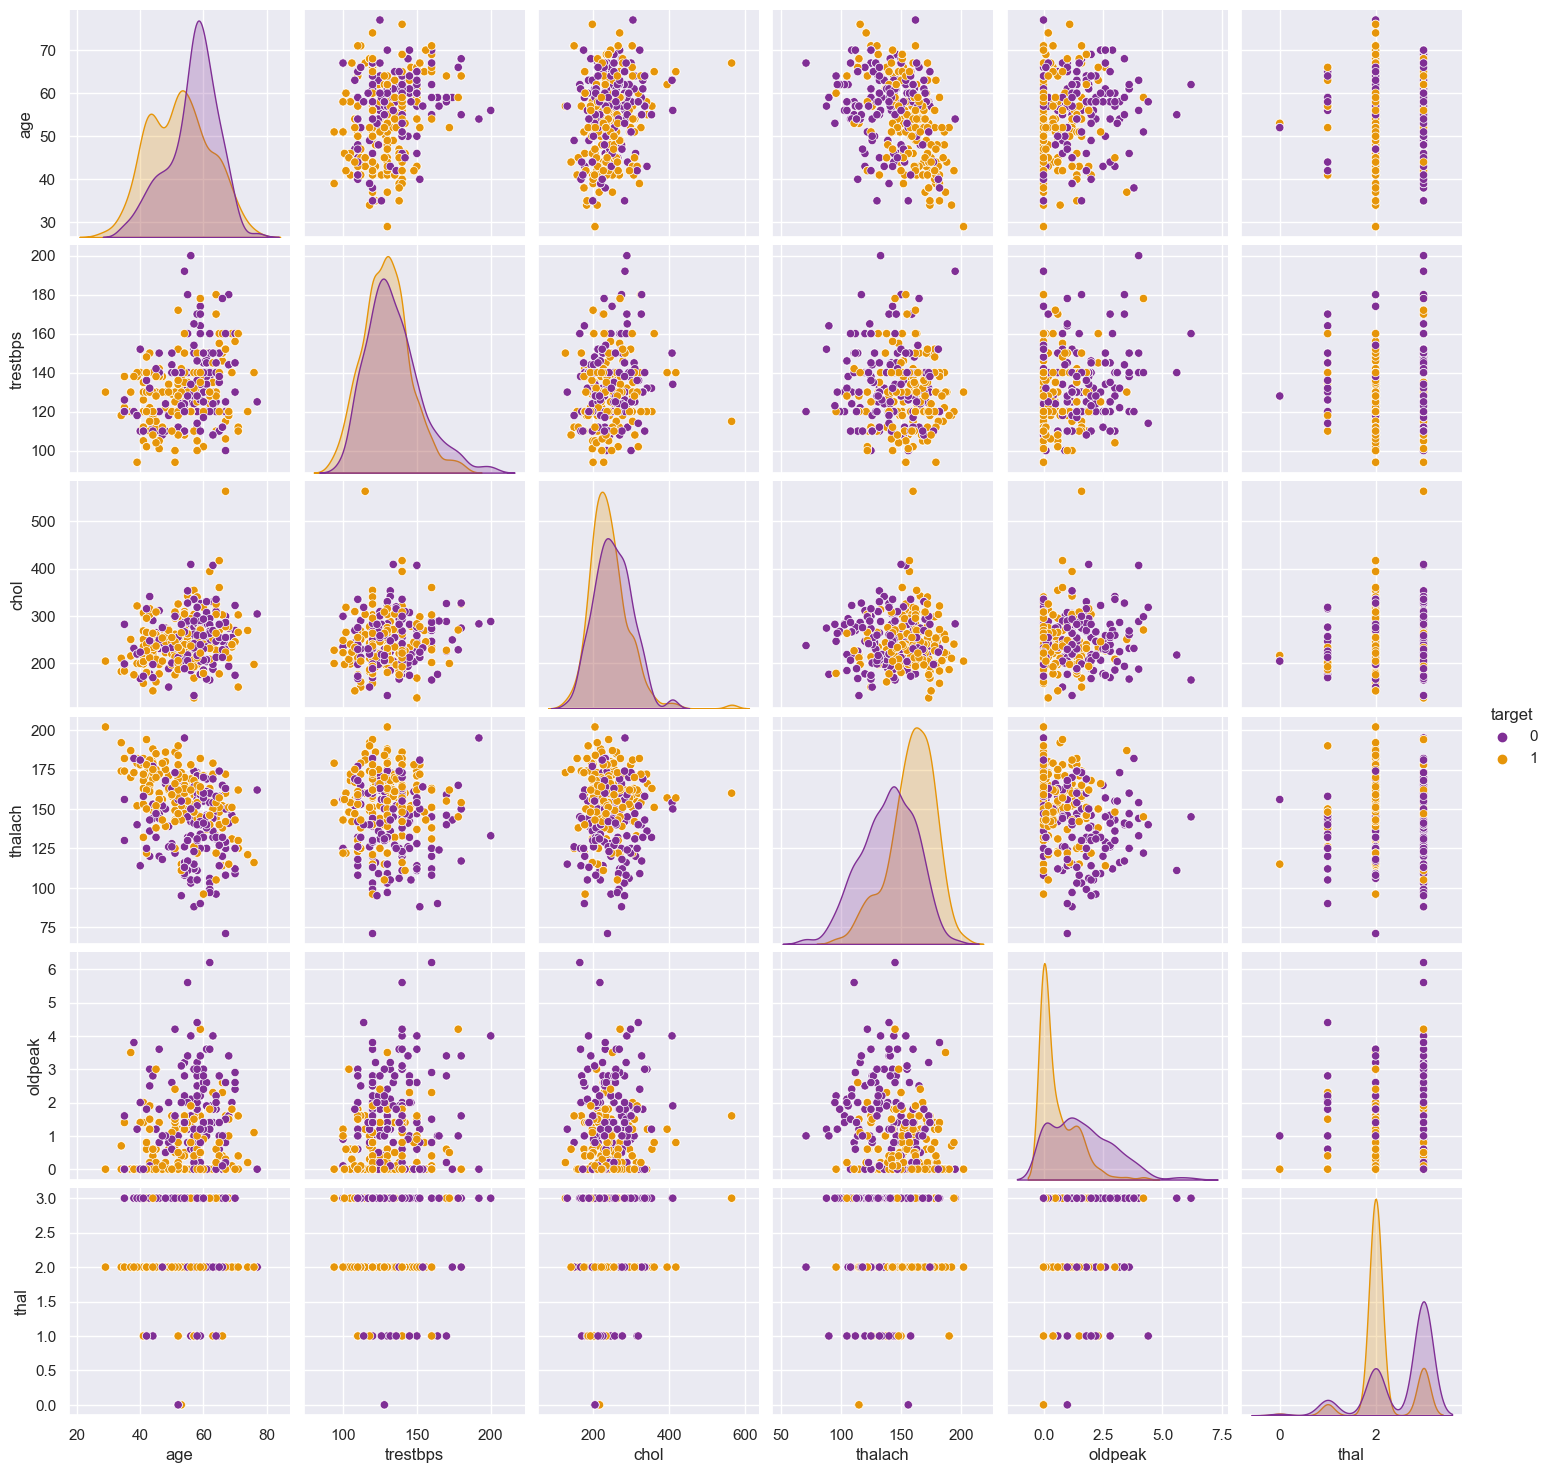

In [22]:
# Pairplot for features that has good variance (well spread) in our dataset.

sns.pairplot(heart_data[['age','trestbps','chol','thalach','oldpeak','thal','target']],hue = 'target', palette = 'CMRmap')
plt.show()

In [23]:
heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [24]:
# Let's visualize the data using box plots.

columns = ['age','trestbps','chol','thalach','oldpeak']

for col in columns:
    fig = px.box(x = col, data_frame = heart_data)
    fig.show()   

## Insights:

Resting blood pressure (trestbps) & cholestrol seems to be having outliers.

In [25]:
# Let's fetch the no. of outlier records that will be removed.

def outlier_indices(df,features):
    q1 = df[features].quantile(0.25)
    q3 = df[features].quantile(0.75)
    
    IQR = q3 - q1
    
    lower_fence = q1 - (1.5 * IQR)
    upper_fence = q3 + (1.5 * IQR)
    
    outlier_indices = df[(df[features] < lower_fence) | (df[features] > upper_fence)].index
    
    return outlier_indices

outlier_indices_list = []

for feature in ['trestbps','chol']:
    outlier_indices_list.extend(outlier_indices(heart_data,feature))   
    

In [26]:
# To fetch the total count of indices that has outliers (with duplicates).
len(outlier_indices_list)

46

In [27]:
# To fetch the total count of indices that has outliers (without duplicates).
len(set(outlier_indices_list))

46

In [28]:
heart_data_copy = heart_data.copy()

In [29]:
heart_data_copy.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [30]:
print(outlier_indices_list,'\t')

[29, 47, 87, 137, 151, 175, 229, 246, 257, 294, 326, 343, 396, 436, 452, 496, 508, 509, 528, 609, 624, 636, 679, 688, 837, 891, 896, 944, 971, 986, 123, 158, 179, 192, 255, 450, 464, 481, 542, 578, 641, 665, 685, 889, 958, 996] 	


In [31]:
print(sorted(set(outlier_indices_list)))

[29, 47, 87, 123, 137, 151, 158, 175, 179, 192, 229, 246, 255, 257, 294, 326, 343, 396, 436, 450, 452, 464, 481, 496, 508, 509, 528, 542, 578, 609, 624, 636, 641, 665, 679, 685, 688, 837, 889, 891, 896, 944, 958, 971, 986, 996]


In [32]:
# Function to remove the outliers.

def remove_outliers(df,index_list):
    list_index = sorted(set(index_list))
    df = df.drop(list_index)
    return df

In [33]:
# Shape of dataframe.
heart_data_copy.shape

(1025, 14)

In [34]:
# Calling remove_outliers function.

heart_data_copy = remove_outliers(heart_data_copy,outlier_indices_list)

In [35]:
# Shape of dataframe after removing outliers.

heart_data_copy.shape

(979, 14)

In [36]:
heart_data_copy.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [37]:
# Let's visualize the maximum outlier we had for cholestrol which is 564.
heart_data_copy[heart_data_copy['chol'] == 564]

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

In [38]:
# The outlier data is present in actual dataframe.
heart_data[heart_data['chol'] == 564]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
158   67    0   2       115   564    0        0      160      0      1.6   
192   67    0   2       115   564    0        0      160      0      1.6   
464   67    0   2       115   564    0        0      160      0      1.6   

     slope  ca  thal  target  
158      1   0     3       1  
192      1   0     3       1  
464      1   0     3       1

In [39]:
# Split the dataframe into independent & dependent features.

# X = heart_data_copy.drop('target', axis = 1)
X = heart_data_copy.iloc[:,:-1]
# y = heart_data_copy['target']
y = heart_data_copy.iloc[:,-1]

In [40]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2

In [41]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 979, dtype: int64

In [42]:
# Split the dataframe into train & test.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=40)

In [43]:
# To print the dimensions of train & test data.
print(f'Shape of X-train: {X_train.shape}')
print(f'Shape of y-train: {y_train.shape}')
print(f'Shape of X-test: {X_test.shape}')
print(f'Shape of y-test: {y_test.shape}')

Shape of X-train: (783, 13)
Shape of y-train: (783,)
Shape of X-test: (196, 13)
Shape of y-test: (196,)


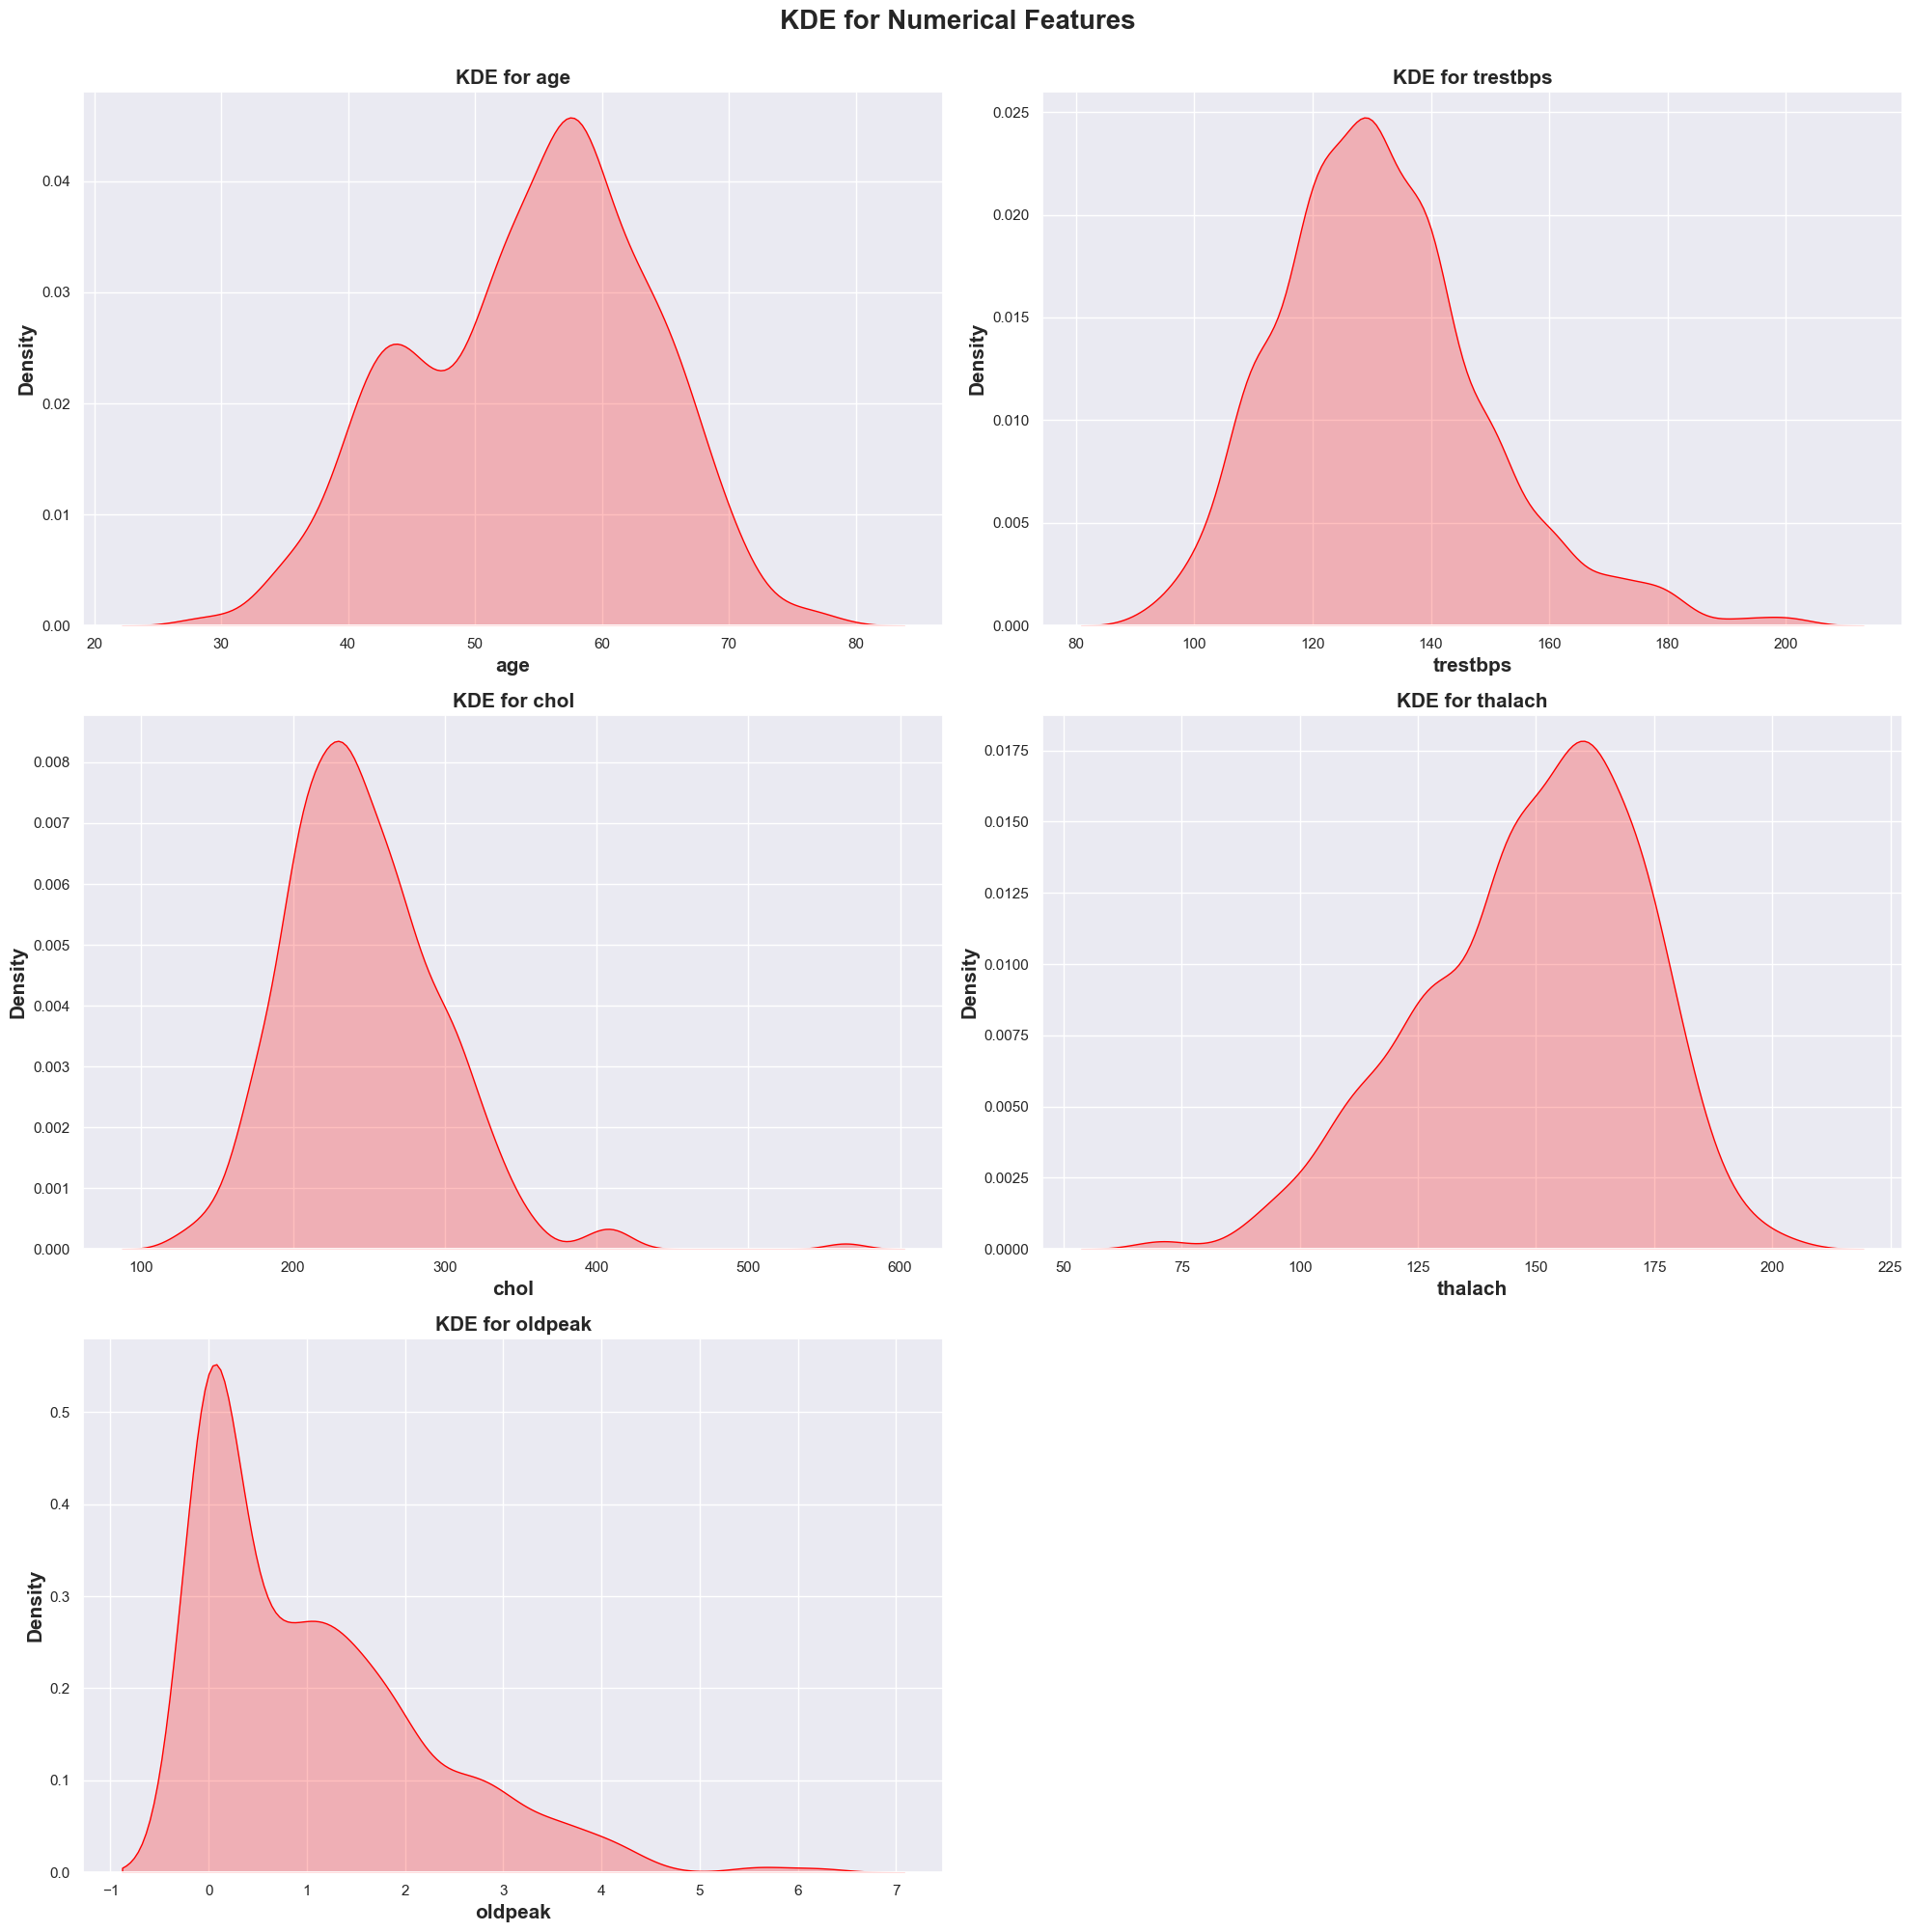

In [44]:
# kde plot for 'age','trestbps','chol','thalach','oldpeak'

columns

plt.figure(figsize = (20,20))
plt.suptitle('KDE for Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 1, y = 1)

for idx,col in enumerate(columns):
    plt.subplot(3,2,idx+1)
    sns.kdeplot(x = col, data = heart_data, shade = True, color = 'red')
    plt.xlabel(col, fontsize = 15, fontweight = 'bold')
    plt.ylabel('Density', fontsize = 15, fontweight = 'bold')
    plt.title(f'KDE for {col}', fontsize = 15, fontweight = 'bold', alpha = 1 , y = 1)

plt.tight_layout()
plt.show()

## Insights:

1. Most of the people in this dataset are between 55 - 60 years of age. The second highest is between 40 - 43 years of age. So, this is an example of multimodal KDE.
2. This resembles a normal dist. where the resting blood pressure (trestbps) is mostly around 130.
3. Most of the people in this dataset are with cholestrol ranging between 200 - 230 mg/dl
4. The maximum heart rate achieved is around 155 - 165 beats per minute.

In [45]:
# Let's apply all the 3 scaling techniques.

# Apply Standard Scaler.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [46]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Apply Min Max Scaler.

min_max = MinMaxScaler()
min_max.fit(X_train)

MinMaxScaler()

In [48]:
X_train_min_max = min_max.transform(X_train)
X_test_min_max = min_max.transform(X_test)

In [49]:
# Apply Normalizer.

normalizer = Normalizer()
normalizer.fit(X_train)

Normalizer()

In [50]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [51]:
X_train.iloc[0,:]

age          48.0
sex           1.0
cp            1.0
trestbps    130.0
chol        245.0
fbs           0.0
restecg       0.0
thalach     180.0
exang         0.0
oldpeak       0.2
slope         1.0
ca            0.0
thal          2.0
Name: 752, dtype: float64

In [52]:
X_train_scaled[0],X_train_min_max[0],X_train_norm[0]

(array([-0.68119165,  0.62116077,  0.03196164, -0.01588532,  0.04497089,
        -0.41067836, -0.97589733,  1.35329528, -0.7030468 , -0.72920861,
        -0.65738409, -0.73014864, -0.50515758]),
 array([0.39583333, 1.        , 0.33333333, 0.47368421, 0.50854701,
        0.        , 0.        , 0.83206107, 0.        , 0.03225806,
        0.5       , 0.        , 0.66666667]),
 array([1.43661047e-01, 2.99293847e-03, 2.99293847e-03, 3.89082001e-01,
        7.33269925e-01, 0.00000000e+00, 0.00000000e+00, 5.38728925e-01,
        0.00000000e+00, 5.98587694e-04, 2.99293847e-03, 0.00000000e+00,
        5.98587694e-03]))

## Logistic Regression Model Training

In [53]:
# Let's create a dummy classifier model to see its accuracy.
dummy_scaled = DummyClassifier()
dummy_scaled.fit(X_train_scaled,y_train)

DummyClassifier()

In [54]:
dummy_pred = dummy_scaled.predict(X_test_scaled)

In [55]:
# Compare Actual & Predicted Values.

dummy_clf_compare = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values (Dummy Classifier)' : dummy_pred
})

dummy_clf_compare.head()

Actual Values  Predicted Values (Dummy Classifier)
107              0                                    1
43               0                                    1
970              1                                    1
434              1                                    1
474              0                                    1

In [56]:
# To evaluate the model performance.

dummy_scaled_acc_train = accuracy_score(y_train,dummy_scaled.predict(X_train_scaled))
dummy_scaled_acc_test = accuracy_score(y_test,dummy_scaled.predict(X_test_scaled))

print(f'Accuracy Score of Training data : {dummy_scaled_acc_train}')
print(f'Accuracy Score of Testing data : {dummy_scaled_acc_test}')

print(confusion_matrix(y_test,dummy_pred))

print(classification_report(y_test,dummy_pred))

Accuracy Score of Training data : 0.5172413793103449
Accuracy Score of Testing data : 0.5255102040816326
[[  0  93]
 [  0 103]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.53      1.00      0.69       103

    accuracy                           0.53       196
   macro avg       0.26      0.50      0.34       196
weighted avg       0.28      0.53      0.36       196



In [57]:
# TN - 0
# TP - 103
# FP - 93
# FN - 0

In [58]:
# Let's predict probabilities of dummy classifier for the output classes 0 & 1.
dummy_scaled.predict_proba(X_test_scaled)

array([[0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.48275862, 0.51724138],
       [0.

In [59]:
# Let's compare the probabilities and predicted output for first 10 rows.

print(f'Predicted Output : {dummy_scaled.predict(X_test_scaled)[:10]}')
print(f'Predicted Probabilities : {dummy_scaled.predict_proba(X_test_scaled)[:10]}')

Predicted Output : [1 1 1 1 1 1 1 1 1 1]
Predicted Probabilities : [[0.48275862 0.51724138]
 [0.48275862 0.51724138]
 [0.48275862 0.51724138]
 [0.48275862 0.51724138]
 [0.48275862 0.51724138]
 [0.48275862 0.51724138]
 [0.48275862 0.51724138]
 [0.48275862 0.51724138]
 [0.48275862 0.51724138]
 [0.48275862 0.51724138]]


## Insights:

As we can see that for first 10 records, the predicted output is 1 which is why probability of 1s is higher than 0s.

In [60]:
# Let's consider only positive classes(1) probability.

dummy_pos_prob = dummy_scaled.predict_proba(X_test_scaled)[:,1]
dummy_pos_prob

array([0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724138,
       0.51724138, 0.51724138, 0.51724138, 0.51724138, 0.51724

In [61]:
# To evaluate roc auc score.

dummy_roc_auc_score = roc_auc_score(y_test,dummy_pos_prob)
print(f'AUC Score for Dummy Model --> {dummy_roc_auc_score}')

AUC Score for Dummy Model --> 0.5


## Insights:

AUC Score of 0.5 denotes that the dummy classifier model is randomly predicting the output without even understanding the input features provided.

## Logistic Regression Model Training

In [62]:
# Let's fit the model using data points of standard scaler.

log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [63]:
log_reg_scaled_pred = log_reg_scaled.predict(X_test_scaled)

In [64]:
# Compare Actual & Predicted Values.

log_reg_scaled_compare = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values (Log Reg Scaled)' : log_reg_scaled_pred
})

log_reg_scaled_compare.head()

Actual Values  Predicted Values (Log Reg Scaled)
107              0                                  0
43               0                                  0
970              1                                  1
434              1                                  1
474              0                                  0

In [65]:
# To fetch the probabilities for the output classes predictd.

log_reg_scaled_prob = log_reg_scaled.predict_proba(X_test_scaled)
log_reg_scaled_prob

array([[9.63927068e-01, 3.60729321e-02],
       [7.07733244e-01, 2.92266756e-01],
       [3.24895240e-01, 6.75104760e-01],
       [2.24022990e-02, 9.77597701e-01],
       [5.13301299e-01, 4.86698701e-01],
       [9.88569171e-01, 1.14308290e-02],
       [1.01080941e-01, 8.98919059e-01],
       [9.99715314e-01, 2.84685664e-04],
       [4.31569951e-02, 9.56843005e-01],
       [2.24022990e-02, 9.77597701e-01],
       [2.03979151e-02, 9.79602085e-01],
       [2.00506965e-01, 7.99493035e-01],
       [9.92615819e-01, 7.38418096e-03],
       [1.86789340e-01, 8.13210660e-01],
       [5.56999371e-01, 4.43000629e-01],
       [8.88294999e-01, 1.11705001e-01],
       [8.98548020e-01, 1.01451980e-01],
       [1.56604596e-02, 9.84339540e-01],
       [9.93051368e-01, 6.94863246e-03],
       [1.59382917e-01, 8.40617083e-01],
       [9.19496033e-01, 8.05039673e-02],
       [4.40247633e-01, 5.59752367e-01],
       [9.96866719e-01, 3.13328111e-03],
       [5.82248455e-01, 4.17751545e-01],
       [2.127281

In [66]:
# To find the output classes for first 10 records.
print(log_reg_scaled.predict(X_test_scaled)[:10])

[0 0 1 1 0 0 1 0 1 1]


In [67]:
# To find the probabilities of the output classes for first 10 records.
print(log_reg_scaled.predict_proba(X_test_scaled)[:10])

[[9.63927068e-01 3.60729321e-02]
 [7.07733244e-01 2.92266756e-01]
 [3.24895240e-01 6.75104760e-01]
 [2.24022990e-02 9.77597701e-01]
 [5.13301299e-01 4.86698701e-01]
 [9.88569171e-01 1.14308290e-02]
 [1.01080941e-01 8.98919059e-01]
 [9.99715314e-01 2.84685664e-04]
 [4.31569951e-02 9.56843005e-01]
 [2.24022990e-02 9.77597701e-01]]


In [68]:
# To fetch only negative classes' probabilities.

log_reg_scaled_neg_prob = log_reg_scaled.predict_proba(X_test_scaled)[:,0]
print(log_reg_scaled_neg_prob)

[0.96392707 0.70773324 0.32489524 0.0224023  0.5133013  0.98856917
 0.10108094 0.99971531 0.043157   0.0224023  0.02039792 0.20050696
 0.99261582 0.18678934 0.55699937 0.888295   0.89854802 0.01566046
 0.99305137 0.15938292 0.91949603 0.44024763 0.99686672 0.58224845
 0.21272816 0.03271804 0.33216219 0.98077446 0.39910555 0.99659041
 0.18678934 0.03078988 0.72956477 0.35587552 0.15035141 0.47027921
 0.92843204 0.28922466 0.05816488 0.24708249 0.08584357 0.15035141
 0.08899782 0.86559998 0.85185394 0.97700828 0.96283891 0.16988759
 0.70814831 0.16953901 0.00171094 0.17309891 0.88083045 0.27525427
 0.97700828 0.14928054 0.70814831 0.1521434  0.03591893 0.05212463
 0.50780684 0.58224845 0.2596876  0.76152153 0.0548704  0.03877637
 0.53658338 0.29601354 0.888295   0.29740689 0.20615883 0.95602066
 0.03661785 0.95097379 0.85185394 0.03444427 0.86505678 0.06827551
 0.98844953 0.00617469 0.888295   0.27102244 0.99758779 0.93096937
 0.97787615 0.01370905 0.5133013  0.97787615 0.95442935 0.8902

In [69]:
# To fetch only positive classes' probabilities.

log_reg_scaled_pos_prob = log_reg_scaled.predict_proba(X_test_scaled)[:,1]
print(log_reg_scaled_pos_prob)

[3.60729321e-02 2.92266756e-01 6.75104760e-01 9.77597701e-01
 4.86698701e-01 1.14308290e-02 8.98919059e-01 2.84685664e-04
 9.56843005e-01 9.77597701e-01 9.79602085e-01 7.99493035e-01
 7.38418096e-03 8.13210660e-01 4.43000629e-01 1.11705001e-01
 1.01451980e-01 9.84339540e-01 6.94863246e-03 8.40617083e-01
 8.05039673e-02 5.59752367e-01 3.13328111e-03 4.17751545e-01
 7.87271843e-01 9.67281956e-01 6.67837809e-01 1.92255382e-02
 6.00894446e-01 3.40958562e-03 8.13210660e-01 9.69210121e-01
 2.70435228e-01 6.44124483e-01 8.49648595e-01 5.29720789e-01
 7.15679556e-02 7.10775340e-01 9.41835121e-01 7.52917506e-01
 9.14156435e-01 8.49648595e-01 9.11002182e-01 1.34400023e-01
 1.48146058e-01 2.29917199e-02 3.71610920e-02 8.30112409e-01
 2.91851692e-01 8.30460995e-01 9.98289058e-01 8.26901088e-01
 1.19169549e-01 7.24745732e-01 2.29917199e-02 8.50719458e-01
 2.91851692e-01 8.47856603e-01 9.64081068e-01 9.47875368e-01
 4.92193156e-01 4.17751545e-01 7.40312404e-01 2.38478471e-01
 9.45129601e-01 9.612236

In [70]:
# To evaluate the performance of the model.

log_reg_scaled_acc_score_train = accuracy_score(y_train,log_reg_scaled.predict(X_train_scaled))
log_reg_scaled_acc_score_test = accuracy_score(y_test,log_reg_scaled.predict(X_test_scaled))

print(f'Accuracy Score of Training data : {log_reg_scaled_acc_score_train}')
print(f'Accuracy Score of Testing data : {log_reg_scaled_acc_score_test}')

print(confusion_matrix(y_test,log_reg_scaled.predict(X_test_scaled)))

print(classification_report(y_test,log_reg_scaled.predict(X_test_scaled)))

print(f'AUC Score for Positive Classes : {roc_auc_score(y_test,log_reg_scaled_pos_prob)}')
print(f'AUC Score for Negative Classes : {roc_auc_score(y_test,log_reg_scaled_neg_prob)}')

Accuracy Score of Training data : 0.8544061302681992
Accuracy Score of Testing data : 0.8367346938775511
[[76 17]
 [15 88]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        93
           1       0.84      0.85      0.85       103

    accuracy                           0.84       196
   macro avg       0.84      0.84      0.84       196
weighted avg       0.84      0.84      0.84       196

AUC Score for Positive Classes : 0.9120993840693182
AUC Score for Negative Classes : 0.0879006159306817


In [71]:
# TN --> 76
# TP --> 88
# FP --> 17
# FN --> 15

## Insights:

1. FN which is Type II error is least when compared to FP (Type I Error).
2. AUC Score of positive classes has higher probability than that of negative classes. This denotes that the model is able to discriminate the classes well and is more likely to focus on positive classes (with disease) than negative classes (without disease).

In [72]:
# Let's fit the model using data points of min max scaler.

log_reg_min_max = LogisticRegression()
log_reg_min_max.fit(X_train_min_max,y_train)

LogisticRegression()

In [73]:
log_reg_min_max_pred = log_reg_min_max.predict(X_test_min_max)

In [74]:
# Compare Actual & Predicted Values.

log_reg_minmax_compare = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values (Min Max)' : log_reg_min_max_pred
})

log_reg_minmax_compare.head()

Actual Values  Predicted Values (Min Max)
107              0                           0
43               0                           0
970              1                           1
434              1                           1
474              0                           0

In [75]:
# To fetch the probabilities for the output classes predictd.

log_reg_min_max_prob = log_reg_min_max.predict_proba(X_test_min_max)
print(log_reg_min_max_prob)

[[0.91153176 0.08846824]
 [0.61487173 0.38512827]
 [0.35755739 0.64244261]
 [0.04690934 0.95309066]
 [0.54381079 0.45618921]
 [0.96657948 0.03342052]
 [0.14473024 0.85526976]
 [0.99794447 0.00205553]
 [0.06575623 0.93424377]
 [0.04690934 0.95309066]
 [0.04836112 0.95163888]
 [0.2441937  0.7558063 ]
 [0.97851761 0.02148239]
 [0.2601864  0.7398136 ]
 [0.54652401 0.45347599]
 [0.81908905 0.18091095]
 [0.85434579 0.14565421]
 [0.0359705  0.9640295 ]
 [0.98156407 0.01843593]
 [0.20473636 0.79526364]
 [0.89503703 0.10496297]
 [0.39937239 0.60062761]
 [0.98690038 0.01309962]
 [0.45561943 0.54438057]
 [0.27710976 0.72289024]
 [0.04922355 0.95077645]
 [0.29690099 0.70309901]
 [0.96940125 0.03059875]
 [0.46341005 0.53658995]
 [0.9878651  0.0121349 ]
 [0.2601864  0.7398136 ]
 [0.04960748 0.95039252]
 [0.66481554 0.33518446]
 [0.36333926 0.63666074]
 [0.16520534 0.83479466]
 [0.5006128  0.4993872 ]
 [0.91291758 0.08708242]
 [0.37097362 0.62902638]
 [0.08074191 0.91925809]
 [0.1887555  0.8112445 ]


In [76]:
# To fetch first 10 records of output classes predicted.

print(log_reg_min_max.predict(X_test_scaled)[:10])

[0 1 1 1 1 0 1 0 1 1]


In [77]:
# To fetch first 10 records of output classes' probabilities predicted.

print(log_reg_min_max.predict_proba(X_test_scaled)[:10])

[[9.99628691e-01 3.71309107e-04]
 [1.52161190e-01 8.47838810e-01]
 [6.87597183e-04 9.99312403e-01]
 [2.71928038e-07 9.99999728e-01]
 [2.24023696e-02 9.77597630e-01]
 [9.99994576e-01 5.42418470e-06]
 [1.11702702e-05 9.99988830e-01]
 [1.00000000e+00 3.32022072e-10]
 [8.00983443e-06 9.99991990e-01]
 [2.71928038e-07 9.99999728e-01]]


In [78]:
# To fetch only negative classes' probabilities.

log_reg_minmax_neg_prob = log_reg_min_max.predict_proba(X_test_scaled)[:,0]
print(log_reg_minmax_neg_prob)

[9.99628691e-01 1.52161190e-01 6.87597183e-04 2.71928038e-07
 2.24023696e-02 9.99994576e-01 1.11702702e-05 1.00000000e+00
 8.00983443e-06 2.71928038e-07 1.95514508e-08 1.38009349e-03
 9.99985570e-01 2.71522202e-05 1.02690538e-01 6.53153890e-01
 9.03939587e-01 1.62005224e-07 9.99992645e-01 8.59697025e-05
 9.23260302e-01 1.40235085e-02 9.99999620e-01 7.94021483e-01
 3.15467548e-04 5.18997573e-06 8.92606589e-03 9.99879635e-01
 2.51923245e-03 9.99998436e-01 2.71522202e-05 4.01219685e-06
 6.06036498e-01 7.94071400e-04 2.80745054e-05 4.17698697e-03
 9.74370253e-01 1.50130994e-03 7.06673987e-06 9.02281558e-03
 2.97387345e-06 2.80745054e-05 3.32846146e-06 5.83222382e-01
 5.68584455e-01 9.99612072e-01 9.96809203e-01 3.66019458e-04
 9.07236968e-02 2.11685749e-05 1.03854703e-10 6.12308454e-04
 9.63427783e-01 1.01459002e-03 9.99612072e-01 4.59377689e-06
 9.07236968e-02 3.76122554e-03 7.09757399e-07 2.43527721e-06
 4.93521441e-03 7.94021483e-01 1.16891234e-03 2.98566791e-01
 2.93863327e-06 2.823653

In [79]:
# To fetch only positive classes' probabilities.

log_reg_minmax_pos_prob = log_reg_min_max.predict_proba(X_test_scaled)[:,1]
print(log_reg_minmax_pos_prob)

[3.71309107e-04 8.47838810e-01 9.99312403e-01 9.99999728e-01
 9.77597630e-01 5.42418470e-06 9.99988830e-01 3.32022072e-10
 9.99991990e-01 9.99999728e-01 9.99999980e-01 9.98619907e-01
 1.44299580e-05 9.99972848e-01 8.97309462e-01 3.46846110e-01
 9.60604129e-02 9.99999838e-01 7.35453504e-06 9.99914030e-01
 7.67396981e-02 9.85976492e-01 3.80442748e-07 2.05978517e-01
 9.99684532e-01 9.99994810e-01 9.91073934e-01 1.20365317e-04
 9.97480768e-01 1.56441154e-06 9.99972848e-01 9.99995988e-01
 3.93963502e-01 9.99205929e-01 9.99971925e-01 9.95823013e-01
 2.56297466e-02 9.98498690e-01 9.99992933e-01 9.90977184e-01
 9.99997026e-01 9.99971925e-01 9.99996672e-01 4.16777618e-01
 4.31415545e-01 3.87927674e-04 3.19079696e-03 9.99633981e-01
 9.09276303e-01 9.99978831e-01 1.00000000e+00 9.99387692e-01
 3.65722168e-02 9.98985410e-01 3.87927674e-04 9.99995406e-01
 9.09276303e-01 9.96238774e-01 9.99999290e-01 9.99997565e-01
 9.95064786e-01 2.05978517e-01 9.98831088e-01 7.01433209e-01
 9.99997061e-01 9.999997

In [80]:
# To evaluate model performance.

log_reg_minmax_acc_score_train = accuracy_score(y_train,log_reg_min_max.predict(X_train_min_max))
log_reg_minmax_acc_score_test = accuracy_score(y_test,log_reg_min_max.predict(X_test_min_max))

print(f'Accuracy Score of Training Data : {log_reg_minmax_acc_score_train}')
print(f'Accuracy Score of Testing Data : {log_reg_minmax_acc_score_test}')

print(confusion_matrix(y_test,log_reg_min_max.predict(X_test_min_max)))

print(classification_report(y_test,log_reg_min_max.predict(X_test_min_max)))

print(f'AUC Score for Positive Classes : {roc_auc_score(y_test,log_reg_minmax_pos_prob)}')
print(f'AUC Score for Negative Classes : {roc_auc_score(y_test,log_reg_minmax_neg_prob)}')

Accuracy Score of Training Data : 0.8607918263090677
Accuracy Score of Testing Data : 0.8367346938775511
[[75 18]
 [14 89]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        93
           1       0.83      0.86      0.85       103

    accuracy                           0.84       196
   macro avg       0.84      0.84      0.84       196
weighted avg       0.84      0.84      0.84       196

AUC Score for Positive Classes : 0.9040609666979852
AUC Score for Negative Classes : 0.09593903330201481


In [83]:
# TN --> 75
# TP --> 89
# FP --> 18
# FN --> 14

## Insights:

The count of FN has been reduced by 1 which is good improvement with respect to this requirement.

In [84]:
# Let's fit the model using data points of Normalizer.

log_reg_norm = LogisticRegression()
log_reg_norm.fit(X_train_norm,y_train)

LogisticRegression()

In [85]:
log_reg_norm_pred = log_reg_norm.predict(X_test_norm)

In [86]:
# Compare Actual & Predicted Values.

log_reg_compare_norm = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values (Normalizer)' : log_reg_norm_pred
})

log_reg_compare_norm.head()

Actual Values  Predicted Values (Normalizer)
107              0                              0
43               0                              1
970              1                              1
434              1                              1
474              0                              1

In [87]:
# To fetch the probabilities of output classes.

log_reg_norm_prob = log_reg_norm.predict_proba(X_test_norm)
print(log_reg_norm_prob)

[[0.71028081 0.28971919]
 [0.49651858 0.50348142]
 [0.27297308 0.72702692]
 [0.40137355 0.59862645]
 [0.35667498 0.64332502]
 [0.70946523 0.29053477]
 [0.35519369 0.64480631]
 [0.66850941 0.33149059]
 [0.45889586 0.54110414]
 [0.40137355 0.59862645]
 [0.19377874 0.80622126]
 [0.46816298 0.53183702]
 [0.67379905 0.32620095]
 [0.26485879 0.73514121]
 [0.4629996  0.5370004 ]
 [0.65965269 0.34034731]
 [0.6407585  0.3592415 ]
 [0.34109506 0.65890494]
 [0.71556645 0.28443355]
 [0.30280737 0.69719263]
 [0.51493094 0.48506906]
 [0.5427052  0.4572948 ]
 [0.6790478  0.3209522 ]
 [0.72594648 0.27405352]
 [0.29635696 0.70364304]
 [0.52228277 0.47771723]
 [0.48277438 0.51722562]
 [0.52635663 0.47364337]
 [0.53816621 0.46183379]
 [0.66466753 0.33533247]
 [0.26485879 0.73514121]
 [0.39311652 0.60688348]
 [0.38436321 0.61563679]
 [0.34997644 0.65002356]
 [0.48841536 0.51158464]
 [0.44664379 0.55335621]
 [0.44861649 0.55138351]
 [0.4782164  0.5217836 ]
 [0.467377   0.532623  ]
 [0.60610624 0.39389376]


In [88]:
# To fetch the probabilities of positive classes' output.

log_reg_norm_pos_prob = log_reg_norm.predict_proba(X_test_norm)[:,1]
print(log_reg_norm_pos_prob)

[0.28971919 0.50348142 0.72702692 0.59862645 0.64332502 0.29053477
 0.64480631 0.33149059 0.54110414 0.59862645 0.80622126 0.53183702
 0.32620095 0.73514121 0.5370004  0.34034731 0.3592415  0.65890494
 0.28443355 0.69719263 0.48506906 0.4572948  0.3209522  0.27405352
 0.70364304 0.47771723 0.51722562 0.47364337 0.46183379 0.33533247
 0.73514121 0.60688348 0.61563679 0.65002356 0.51158464 0.55335621
 0.55138351 0.5217836  0.532623   0.39389376 0.51215896 0.51158464
 0.65296716 0.61505028 0.41025085 0.30220716 0.50845252 0.52909404
 0.65679903 0.64710653 0.7651543  0.34310864 0.46779207 0.60149676
 0.30220716 0.61116042 0.65679903 0.34834363 0.74427665 0.61023536
 0.57039234 0.27405352 0.60343386 0.54416856 0.54881568 0.71052774
 0.470495   0.61343686 0.34034731 0.53380191 0.50082507 0.52816731
 0.72786928 0.4759115  0.41025085 0.57962555 0.20511522 0.56026476
 0.38685274 0.71233758 0.34034731 0.56032147 0.26570933 0.53189916
 0.33228686 0.57100078 0.64332502 0.33228686 0.49465438 0.5410

In [89]:
# To fetch the probabilities of negative classes' output.

log_reg_norm_neg_prob = log_reg_norm.predict_proba(X_test_norm)[:,0]
print(log_reg_norm_neg_prob)

[0.71028081 0.49651858 0.27297308 0.40137355 0.35667498 0.70946523
 0.35519369 0.66850941 0.45889586 0.40137355 0.19377874 0.46816298
 0.67379905 0.26485879 0.4629996  0.65965269 0.6407585  0.34109506
 0.71556645 0.30280737 0.51493094 0.5427052  0.6790478  0.72594648
 0.29635696 0.52228277 0.48277438 0.52635663 0.53816621 0.66466753
 0.26485879 0.39311652 0.38436321 0.34997644 0.48841536 0.44664379
 0.44861649 0.4782164  0.467377   0.60610624 0.48784104 0.48841536
 0.34703284 0.38494972 0.58974915 0.69779284 0.49154748 0.47090596
 0.34320097 0.35289347 0.2348457  0.65689136 0.53220793 0.39850324
 0.69779284 0.38883958 0.34320097 0.65165637 0.25572335 0.38976464
 0.42960766 0.72594648 0.39656614 0.45583144 0.45118432 0.28947226
 0.529505   0.38656314 0.65965269 0.46619809 0.49917493 0.47183269
 0.27213072 0.5240885  0.58974915 0.42037445 0.79488478 0.43973524
 0.61314726 0.28766242 0.65965269 0.43967853 0.73429067 0.46810084
 0.66771314 0.42899922 0.35667498 0.66771314 0.50534562 0.4589

In [90]:
# To evaluate the model's performance.

log_reg_norm_acc_score_train = accuracy_score(y_train,log_reg_norm.predict(X_train_norm))
log_reg_norm_acc_score_test = accuracy_score(y_test,log_reg_norm.predict(X_test_norm))

print(f'Accuracy Score of Training Data : {log_reg_norm_acc_score_train}')
print(f'Accuracy Score of Testing Data : {log_reg_norm_acc_score_test}')

print(confusion_matrix(y_test, log_reg_norm.predict(X_test_norm)))

print(classification_report(y_test,log_reg_norm.predict(X_test_norm)))

print(f'AUC Score of Positive Classes : {roc_auc_score(y_test,log_reg_norm_pos_prob)}')
print(f'AUC Score of Negative Classes : {roc_auc_score(y_test,log_reg_norm_neg_prob)}')

Accuracy Score of Training Data : 0.6551724137931034
Accuracy Score of Testing Data : 0.6836734693877551
[[55 38]
 [24 79]]
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        93
           1       0.68      0.77      0.72       103

    accuracy                           0.68       196
   macro avg       0.69      0.68      0.68       196
weighted avg       0.69      0.68      0.68       196

AUC Score of Positive Classes : 0.7345234366844138
AUC Score of Negative Classes : 0.26547656331558617


In [91]:
# TN --> 55
# TP --> 79
# FP --> 38
# FN --> 24

## Insights:

1. The count of FN is higher when compared to Logistic Regression with Standard Scaler & Min Max Scaler.
2. Also, AUC Score for positive classes has reduced which denotes that for normalized data points, the model is not able to discriminate well for the positive/negative classes.

## Hyper Parameter Tuning through CV

In [92]:
# Let's apply Grid Search CV for data points with min max scaler.

log_reg_minmax_grid = LogisticRegression()

In [93]:
random_params_grid = {
    'penalty' : ['l1','l2','elasticnet'],
    'C' : [0.0001,0.001,0.01,0.1,0,1,10,100,1000],
    'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
}

In [94]:
grid_cv = GridSearchCV(estimator=log_reg_minmax_grid, param_grid=random_params_grid, scoring = 'accuracy', n_jobs = -1,cv = StratifiedKFold(n_splits=5))
grid_cv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [95]:
# Perform training on grid_cv.

grid_cv.fit(X_train_min_max,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [96]:
# To evaluate the best training accuracy score after using the hyperparameters.

grid_cv.best_score_

0.8492732320757799

In [97]:
# To fetch the best hyperparamters used to find the best training accuracy.

grid_cv.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [98]:
grid_cv.best_estimator_

LogisticRegression(C=1, solver='liblinear')

In [99]:
# Let's apply these hyper parameters to our Logistic Regression Model.

log_reg_minmax_grid = LogisticRegression(C=1, solver = 'liblinear')

In [100]:
log_reg_minmax_grid.fit(X_train_min_max,y_train)

LogisticRegression(C=1, solver='liblinear')

In [101]:
log_reg_minmax_grid_pred = log_reg_minmax_grid.predict(X_test_min_max)

In [102]:
# Compare Actual & Predicted Values.

log_reg_compare_minmax_grid = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values (Min Max Grid)' : log_reg_minmax_grid_pred
})

log_reg_compare_minmax_grid.head()

Actual Values  Predicted Values (Min Max Grid)
107              0                                0
43               0                                0
970              1                                1
434              1                                1
474              0                                0

In [103]:
# To fetch the probabilities of output classes.

log_reg_minmax_grid_prob = log_reg_minmax_grid.predict_proba(X_test_min_max)
print(log_reg_minmax_grid_prob)

[[0.91808619 0.08191381]
 [0.62757404 0.37242596]
 [0.38093109 0.61906891]
 [0.05229294 0.94770706]
 [0.56094143 0.43905857]
 [0.95849229 0.04150771]
 [0.13597726 0.86402274]
 [0.99760065 0.00239935]
 [0.0835068  0.9164932 ]
 [0.05229294 0.94770706]
 [0.05392917 0.94607083]
 [0.26289825 0.73710175]
 [0.9751589  0.0248411 ]
 [0.28701265 0.71298735]
 [0.5526635  0.4473365 ]
 [0.84107646 0.15892354]
 [0.86042987 0.13957013]
 [0.05207325 0.94792675]
 [0.98292229 0.01707771]
 [0.1815852  0.8184148 ]
 [0.89679078 0.10320922]
 [0.38475563 0.61524437]
 [0.98624836 0.01375164]
 [0.49153902 0.50846098]
 [0.27294195 0.72705805]
 [0.05006391 0.94993609]
 [0.25207775 0.74792225]
 [0.96710935 0.03289065]
 [0.49127003 0.50872997]
 [0.98848515 0.01151485]
 [0.28701265 0.71298735]
 [0.05801893 0.94198107]
 [0.64896731 0.35103269]
 [0.34596549 0.65403451]
 [0.17244041 0.82755959]
 [0.51861483 0.48138517]
 [0.92000036 0.07999964]
 [0.41641604 0.58358396]
 [0.08765481 0.91234519]
 [0.20074369 0.79925631]


In [104]:
# To fetch the output classes for first 10 rows.

log_reg_minmax_grid_pred[:10]

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [105]:
# To fetch the probabilities of output classes for first 10 rows.

log_reg_minmax_grid_prob[:10]

array([[0.91808619, 0.08191381],
       [0.62757404, 0.37242596],
       [0.38093109, 0.61906891],
       [0.05229294, 0.94770706],
       [0.56094143, 0.43905857],
       [0.95849229, 0.04150771],
       [0.13597726, 0.86402274],
       [0.99760065, 0.00239935],
       [0.0835068 , 0.9164932 ],
       [0.05229294, 0.94770706]])

In [106]:
# To fetch the prob of positive classes.

log_reg_minmax_grid_pos_prob = log_reg_minmax_grid.predict_proba(X_test_min_max)[:,1]
print(log_reg_minmax_grid_pos_prob)

[0.08191381 0.37242596 0.61906891 0.94770706 0.43905857 0.04150771
 0.86402274 0.00239935 0.9164932  0.94770706 0.94607083 0.73710175
 0.0248411  0.71298735 0.4473365  0.15892354 0.13957013 0.94792675
 0.01707771 0.8184148  0.10320922 0.61524437 0.01375164 0.50846098
 0.72705805 0.94993609 0.74792225 0.03289065 0.50872997 0.01151485
 0.71298735 0.94198107 0.35103269 0.65403451 0.82755959 0.48138517
 0.07999964 0.58358396 0.91234519 0.79925631 0.82483759 0.82755959
 0.85738192 0.15167307 0.12030981 0.04150613 0.05534434 0.68412923
 0.28593322 0.77017528 0.99299473 0.82665376 0.16348787 0.69831463
 0.04150613 0.69853283 0.28593322 0.87148351 0.93693576 0.91462385
 0.51424628 0.50846098 0.63839886 0.28585976 0.90212389 0.92863454
 0.57478773 0.63647078 0.15892354 0.57733954 0.73622676 0.07363575
 0.92410705 0.093022   0.12030981 0.94584661 0.17740997 0.88799258
 0.03731188 0.98087818 0.15892354 0.63751419 0.0091265  0.08415316
 0.05677839 0.97122815 0.43905857 0.05677839 0.09044615 0.1615

In [107]:
# To fetch the prob of negative classes.

log_reg_minmax_grid_neg_prob = log_reg_minmax_grid.predict_proba(X_test_min_max)[:,0]
print(log_reg_minmax_grid_neg_prob)

[0.91808619 0.62757404 0.38093109 0.05229294 0.56094143 0.95849229
 0.13597726 0.99760065 0.0835068  0.05229294 0.05392917 0.26289825
 0.9751589  0.28701265 0.5526635  0.84107646 0.86042987 0.05207325
 0.98292229 0.1815852  0.89679078 0.38475563 0.98624836 0.49153902
 0.27294195 0.05006391 0.25207775 0.96710935 0.49127003 0.98848515
 0.28701265 0.05801893 0.64896731 0.34596549 0.17244041 0.51861483
 0.92000036 0.41641604 0.08765481 0.20074369 0.17516241 0.17244041
 0.14261808 0.84832693 0.87969019 0.95849387 0.94465566 0.31587077
 0.71406678 0.22982472 0.00700527 0.17334624 0.83651213 0.30168537
 0.95849387 0.30146717 0.71406678 0.12851649 0.06306424 0.08537615
 0.48575372 0.49153902 0.36160114 0.71414024 0.09787611 0.07136546
 0.42521227 0.36352922 0.84107646 0.42266046 0.26377324 0.92636425
 0.07589295 0.906978   0.87969019 0.05415339 0.82259003 0.11200742
 0.96268812 0.01912182 0.84107646 0.36248581 0.9908735  0.91584684
 0.94322161 0.02877185 0.56094143 0.94322161 0.90955385 0.8384

In [108]:
# To evaluate the model performance.

log_reg_minmax_grid_acc_score_train = accuracy_score(y_train,log_reg_minmax_grid.predict(X_train_min_max))
log_reg_minmax_grid_acc_score_test = accuracy_score(y_test,log_reg_minmax_grid.predict(X_test_min_max))

print(f'Accuracy Score of Training Data : {log_reg_minmax_acc_score_train}')
print(f'Accuracy Score of Testing Data : {log_reg_minmax_acc_score_test}')

print(confusion_matrix(y_test,log_reg_minmax_grid.predict(X_test_min_max)))
print(classification_report(y_test,log_reg_minmax_grid.predict(X_test_min_max)))
print(f'AUC Score of Positive Classes : {roc_auc_score(y_test,log_reg_minmax_grid_pos_prob)}')
print(f'AUC Score of Negative Classes : {roc_auc_score(y_test,log_reg_minmax_grid_neg_prob)}')

Accuracy Score of Training Data : 0.8607918263090677
Accuracy Score of Testing Data : 0.8367346938775511
[[75 18]
 [14 89]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        93
           1       0.83      0.86      0.85       103

    accuracy                           0.84       196
   macro avg       0.84      0.84      0.84       196
weighted avg       0.84      0.84      0.84       196

AUC Score of Positive Classes : 0.9149180499008248
AUC Score of Negative Classes : 0.08508195009917527


## Insights:

Even After applying Grid Search CV for Min Max data points, the model still gives the same accuracy as like the model which was trained on Min Max datapoints without hyper parameters. Even Randomized Search CV will also result in same accuracy as randomized Search CV will randomly select the given hyperparameters and train the model. So, let us try to use Grid Search CV for Standard Scaler datapoints.

In [109]:
log_reg_scaled_grid = LogisticRegression()

In [110]:
# Define hyperparameters for training standard scaled data points.
params = {
    'penalty' : ['l1','l2','elasticnet'],
    'C' : [0.0001,0.001,0.01,0.1,0,1,10,100,1000],
    'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
}

In [111]:
# Grid Search CV model for standard scaled data points.
grid_cv_scaled = GridSearchCV(estimator=log_reg_scaled_grid,param_grid=params,scoring='accuracy',cv=StratifiedKFold(n_splits=5),n_jobs=-1)
grid_cv_scaled

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [112]:
# Training on standard scaled data points.
grid_cv_scaled.fit(X_train_scaled,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [113]:
# Best Training score.
grid_cv_scaled.best_score_

0.8493222276661767

In [114]:
# Best Hyper parameters.
grid_cv_scaled.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [115]:
# Best estimator/model.
grid_cv_scaled.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [116]:
# Let's apply these hyper parameters in our Logistic Regression Model for standard scaled points.

log_reg_scaled_grid = LogisticRegression(C=0.1,solver='liblinear')

In [117]:
# Fit the Model.
log_reg_scaled_grid.fit(X_train_scaled,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [118]:
# Predict the test values.
log_reg_scaled_pred = log_reg_scaled_grid.predict(X_test_scaled)

In [119]:
# Compare Actual & Predicted Values.

log_reg_scaled_grid_compare = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : log_reg_scaled_pred
})

log_reg_scaled_grid_compare.head()

Actual Values  Predicted Values
107              0                 0
43               0                 0
970              1                 1
434              1                 1
474              0                 0

In [120]:
# To evaluate the model performance.

log_reg_scaled_acc_train = accuracy_score(y_train,log_reg_scaled_grid.predict(X_train_scaled))
log_reg_scaled_acc_test = accuracy_score(y_test,log_reg_scaled_grid.predict(X_test_scaled))

print(f'Accuracy Score of Training data : {log_reg_scaled_acc_train}')
print(f'Accuracy Score of Testing Data : {log_reg_scaled_acc_test}')

print(confusion_matrix(y_test,log_reg_scaled_grid.predict(X_test_scaled)))
print(classification_report(y_test,log_reg_scaled_grid.predict(X_test_scaled)))
print(f'AUC Score for positive Classes : {roc_auc_score(y_test,log_reg_scaled_grid.predict_proba(X_test_scaled)[:,1])}')
print(f'AUC Score for Negative Classes : {roc_auc_score(y_test,log_reg_scaled_grid.predict_proba(X_test_scaled)[:,0])}')

Accuracy Score of Training data : 0.8646232439335888
Accuracy Score of Testing Data : 0.8418367346938775
[[76 17]
 [14 89]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        93
           1       0.84      0.86      0.85       103

    accuracy                           0.84       196
   macro avg       0.84      0.84      0.84       196
weighted avg       0.84      0.84      0.84       196

AUC Score for positive Classes : 0.9127257542540974
AUC Score for Negative Classes : 0.08727424574590249


## Insights:

When compared to baseline Logistic Regression Model with no hyper parameters, this model has an increase in both training & testing accuracy of 1%. Also, there is an increase in recall value which is a good sign.

In [123]:
# Baseline Logistic Regression Model with No Hyper parameters.

# Accuracy Score of Training data : 0.8544061302681992
# Accuracy Score of Testing data : 0.8367346938775511
# [[76 17]
#  [15 88]]
#               precision    recall  f1-score   support

#            0       0.84      0.82      0.83        93
#            1       0.84      0.85      0.85       103

#     accuracy                           0.84       196
#    macro avg       0.84      0.84      0.84       196
# weighted avg       0.84      0.84      0.84       196

# AUC Score for Positive Classes : 0.9120993840693182
# AUC Score for Negative Classes : 0.0879006159306817

## Predicting New Values using Logistic Regression with Grid Search CV using scaled data points.

In [124]:
# Provide the input features in a dataframe or in a 2D array.
# Apply StandardScaler. (scaler)
# Apply Logistic Regression with Grid Search CV for scaled data points. (log_reg_scaled_grid)

In [125]:
heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [139]:
heart_data[heart_data['target']==1].head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
5    58    0   0       100   248    0        0      122      0      1.0   
10   71    0   0       112   149    0        1      125      0      1.6   
12   34    0   1       118   210    0        1      192      0      0.7   
15   34    0   1       118   210    0        1      192      0      0.7   
16   51    0   2       140   308    0        0      142      0      1.5   

    slope  ca  thal  target  
5       1   0     2       1  
10      1   0     2       1  
12      2   0     2       1  
15      2   0     2       1  
16      2   1     2       1

In [151]:
# Provide the input features in a dataframe or in a 2D array.

new_df = pd.DataFrame({
    'age' : [73],
    'sex' : [1],
    'cp' : [0],
    'trestbps' : [180],
    'chol' : [296],
    'fbs'  : [0],
    'restecg' : [0],
    'thalach' : [222],
    'exang' : [0],
    'oldpeak' : [5.4],
    'slope' : [1],
    'ca' : [0],
    'thal' : [2]
})
new_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   73    1   0       180   296    0        0      222      0      5.4      1   

   ca  thal  
0   0     2

In [152]:
# Apply Standard Scaler technique.

scaled_output = scaler.transform(new_df)
scaled_output

array([[ 2.06362649,  0.62116077, -0.93057532,  3.22323128,  1.18228721,
        -0.41067836, -0.97589733,  3.22385968, -0.7030468 ,  3.71015407,
        -0.65738409, -0.73014864, -0.50515758]])

In [153]:
# Apply Logistic Regression using Grid Search CV.

heart_disease = log_reg_scaled_grid.predict(scaled_output)
heart_disease

array([0], dtype=int64)

In [150]:
# To convert Logistic Regression with Grid search CV into a pickle format.

# Standard Scaler.
# Logistic Regression with Grid Search CV model.

pickle.dump(scaler,open('StandardScaler.pkl','wb'))
pickle.dump(log_reg_scaled_grid,open('LogRegGrid.pkl','wb'))

In [ ]:
# Points to Note:
# 1. heart_rate.describe().T --> will transpose the features and statistics parameters.
# 2. In pairplot, the feature we provide in hue argument should also be provided in the feature list. Otherwise, it will
#    throw keyerror. palette = 'CMRmap' is used for a customized color.
# 3. Normalizer Vs Min-Max Scaler --> Normalizer will scale the values on row level and the values can range between
#    0 & 1 whereas Min Max Scaler will scale the values on each feature and the values can range between 0 & 1.
# 4. DummyClassifier is used to create a baseline model that makes a random prediction by considering no input features.
# 5. In Medical kind of project, recall is focussed more than precision as we need to focus more on the model predicting
#    FN.
# 6. In GridSearch CV, when using multiple metrics for scoring parameter, refit should be set as 'False' or should be 
#    set to appropriate scoring metric for refitting the model.